# Лабораторная работа №2(Pandas)

In [8]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Получить от объекта Series показатели описательной статистики

In [7]:
state = np.random.RandomState(42)
 
s = pd.Series(state.normal(10, 5, 25))
pkz = s.describe()
print(pkz)

count    25.000000
mean      9.182460
std       4.782765
min       0.433599
25%       7.188562
50%       8.829315
75%      12.483571
max      17.896064
dtype: float64


Узнать частоту уникальных элементов объекта Series (гистограмма)

<BarContainer object of 8 artists>

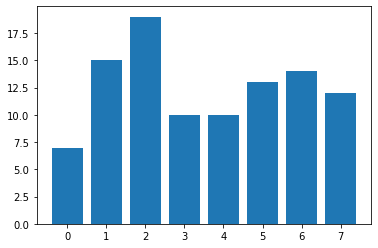

In [9]:
s = pd.Series(np.random.randint(0, 8, 100))
frequency = s.value_counts()
plt.bar(frequency.index, frequency.values)

Заменить все элементы объекта Series на "Other", кроме двух наиболее часто встречающихся

In [7]:
state = np.random.RandomState(42)
s = pd.Series(state.randint(low=1, high=5, size=[13]))
print(s.value_counts())
s[~s.isin(s.value_counts().index[:2])] = 'Other'
print(s)

3    7
1    3
4    2
2    1
dtype: int64
0         3
1     Other
2         1
3         3
4         3
5     Other
6         1
7         1
8         3
9     Other
10        3
11        3
12        3
dtype: object


In [10]:
oldS = pd.Series(np.random.randint(0, 5, 20), name = "Old")
print(oldS.value_counts())
newS = oldS.copy()
newS.name = "New"
newS[~newS.isin(newS.value_counts().index[:2])] = "Other"
pd.concat([oldS, newS], axis = 1)

0    6
1    5
3    4
4    3
2    2
Name: Old, dtype: int64


,Old,New
0,0,0
1,3,Other
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,4,Other
8,2,Other
9,4,Other


Создать объект Series в индексах дата каждый день 2019 года, в значениях случайное значение

In [14]:
dti = pd.date_range(start='2019-01-01', end='2019-12-31') 
s = pd.Series(np.random.rand(len(dti)), index=dti)
print(s)

2019-01-01    0.985474
2019-01-02    0.550824
2019-01-03    0.351226
2019-01-04    0.586889
2019-01-05    0.739837
                ...   
2019-12-27    0.245674
2019-12-28    0.653964
2019-12-29    0.489501
2019-12-30    0.593723
2019-12-31    0.822670
Freq: D, Length: 365, dtype: float64


In [18]:
tuesdaySum = np.sum(s[s.index.weekday == 2])
tuesdaySum

25.86240882648385

Преобразовать объект Series в DataFrame заданной формы (shape)

In [19]:
m = 4
n = 5
s = pd.Series(np.arange(m * n))    
df = pd.DataFrame(s.values.reshape(m, n))
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


Найти индексы объекта Series кратные 3

In [22]:
ans = s[s % 3 == 0].index
print(ans2)

Int64Index([0, 3, 6, 9, 12, 15, 18], dtype='int64')


Получить данные по индексам объекта Series

In [23]:
s = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
p = [0, 4, 8, 14, 20, 10]
ans = s[p]
print(ans)

0     a
4     e
8     i
14    o
20    u
10    k
dtype: object


Объединить два объекта Series вертикально и горизонтально

In [14]:
s1 = pd.Series(range(5))
s2 = pd.Series(list('abcde'))
 
ans_vertical = s1.append(s2)
ans_horizontal = pd.concat([s1, s2], axis=1)
 
print(ans_vertical)
print(ans_horizontal)

0    0
1    1
2    2
3    3
4    4
0    a
1    b
2    c
3    d
4    e
dtype: object
   0  1
0  0  a
1  1  b
2  2  c
3  3  d
4  4  e


Получить индексы объекта Series A, данные которых содержатся в объетке Series B

In [27]:
s1 = pd.Series([5, 3, 2, 1, 4, 11, 13, 8, 7])
s2 = pd.Series([1, 5, 13, 2, 15, 18])
print(s1[s1[s1.isin(s2)].index])

0     5
2     2
3     1
6    13
dtype: int64


Получить объект Series B, котоырй содержит элементы без повторений объекта A

In [30]:
s2 = s1.unique()
s2

array([ 5,  3,  2,  1,  4, 11, 13,  8,  7], dtype=int64)

Преобразовать каждый символ объекта Series в верхний регистр

In [36]:
s = pd.Series(['life', 'is', 'interesting'])
ans1 = s.map(lambda x: x.upper())
print(ans1)

0           LIFE
1             IS
2    INTERESTING
dtype: object


Преобразовать данные Series в строку

In [38]:
s = pd.Series(np.arange(5))
s = s.map(lambda x: str(x))
catString = s.str.cat(sep=" ")
print(catString, type(catString))

0 1 2 3 4 <class 'str'>


Рассчитать количество символов в объекте Series

In [39]:
s = pd.Series(['one', 'two', 'three', 'four', 'five'])
s = pd.Series(str(i) for i in s)
ans2 = np.asarray([len(i) for i in s])
print(ans2)

[3 3 5 4 4]


Найти разность между объектом Series и смещением объекта Series на n

In [40]:
n = 1
s = pd.Series([1, 5, 7, 8, 12, 15, 17])
ans = s.diff(periods=n)
print(ans)

0    NaN
1    4.0
2    2.0
3    1.0
4    4.0
5    3.0
6    2.0
dtype: float64


In [41]:
n = 3
s = pd.Series(np.arange(8))
diff = s.diff(periods = n)
diff

0    NaN
1    NaN
2    NaN
3    3.0
4    3.0
5    3.0
6    3.0
7    3.0
dtype: float64

Преобразовать разыне форматы строк объекта Series в дату

In [42]:
s = pd.Series(['2017/01/01', '2015-02-02', '15 Jan 2019'])
ans = pd.to_datetime(s)
print(ans)

0   2017-01-01
1   2015-02-02
2   2019-01-15
dtype: datetime64[ns]


Поскольку работа с датой часто встречается в работе, то см. еще один пример
все данные должны иметь одинаковый формат (часто бывает выгрузка из SQL)
преобразовать в дату

In [45]:
s = pd.Series(['14.02.2019', '22.01.2019', '01.03.2019'])
ans = pd.to_datetime(s, format='%d%m%Y',errors='ignore')
print(ans)

0    14.02.2019
1    22.01.2019
2    01.03.2019
dtype: object


Получить год, месяц, день, день недели, номер дня в году от объекта Series (string)

In [46]:
from dateutil.parser import parse
 
s = pd.Series(['01 Jan 2018', '02-02-2011', '20120303', '2013/04/04', '2018-12-31'])
 
# парсим в дату и время
s_ts = s.map(lambda x: parse(x, yearfirst=True))
 
# получаем года
print(s_ts.dt.year)
 
# получаем месяца
print(s_ts.dt.month)
 
# получаем дни
print(s_ts.dt.day)
 
# получаем номер недели
print(s_ts.dt.weekofyear)

# получаем номер дня в году
print(s_ts.dt.dayofyear)

0    2018
1    2011
2    2012
3    2013
4    2018
dtype: int64
0     1
1     2
2     3
3     4
4    12
dtype: int64
0     1
1     2
2     3
3     4
4    31
dtype: int64
0     1
1     5
2     9
3    14
4     1
dtype: int64
0      1
1     33
2     63
3     94
4    365
dtype: int64


Отобрать элементы объекта Series, кторые содержат не менее двух гласных

In [28]:
from collections import Counter
 
s = pd.Series(['Яблоко', 'Orange', 'Plan', 'Python', 'Апельсин', 'Стол', 'Reliance'])
mask = s.map(lambda x: sum([Counter(x.lower()).get(i, 0) for i in list('aeiouаоиеёэыуюя')]) >= 2)
ans = s[mask]
print(ans)

0      Яблоко
1      Orange
4    Апельсин
6    Reliance
dtype: object


Отобрать e-маилы из объекта Series (можно юзать регулярки)

In [29]:
import re
 
emails = pd.Series(['test text @test.com', 'test@mail.ru', 'test.2ru', 'test@pp'])
pattern = '[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'
mask = emails.map(lambda x: bool(re.match(pattern, x)))
ans = emails[mask]
print(ans)

1    test@mail.ru
dtype: object


Получить среднее значение каждого уникального объекта Series s1 через "маску" другого объекта Series s2

In [30]:
n = 10
s1 = pd.Series(np.random.choice(['dog', 'cat', 'horse', 'bird'], n))
s2 = pd.Series(np.linspace(1,n,n))
ans = s2.groupby(s1).mean()
print(ans)

bird     6.00
cat      7.00
dog      7.00
horse    3.75
dtype: float64
